In [1]:
# std
import os
import sys
import re

# 3rd party
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


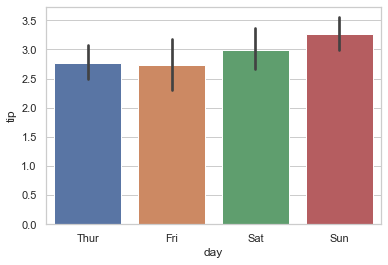

In [4]:
ax = sns.barplot(x="day", y="tip", data=tips)

In [5]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


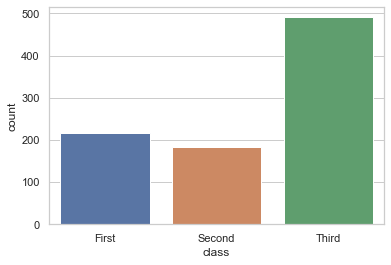

In [6]:
ax = sns.countplot(x="class", data=titanic)

In [7]:
# get connected to the database
connection = pg.connect(user='scientist',
                        password='******',
                        host='127.0.01',
                        port='5432',
                        database='tensor_factorisation_fb15k')

In [8]:
entity = psql.read_sql("""SELECT DISTINCT subject FROM train UNION SELECT DISTINCT object FROM train
                          UNION SELECT DISTINCT subject FROM valid UNION SELECT DISTINCT object FROM valid
                          UNION SELECT DISTINCT subject FROM test UNION SELECT DISTINCT object FROM test
                        """, connection)
entity.head()

,subject
0,/m/0bw87
1,/m/0cp9f9
2,/m/07k2mq
3,/m/022_lg
4,/m/026ldz7


In [9]:
entity.count()

subject    14951
dtype: int64

In [10]:
entity_counts = entity.count().to_frame()
entity_counts.head()

,0
subject,14951


In [11]:
entity_counts = entity_counts.reset_index()
entity_counts.head()

,index,0
0,subject,14951


In [12]:
entity_counts = entity_counts.rename(columns={'index': 'label', 0: 'value'})
entity_counts.head()

,label,value
0,subject,14951


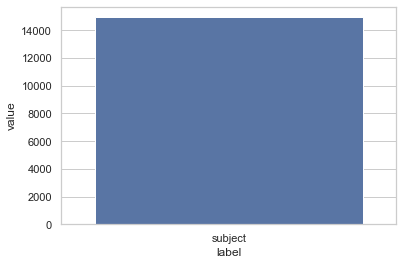

In [13]:
ax = sns.barplot(x="label", y="value", data=entity_counts)

In [14]:
relation = psql.read_sql("SELECT * FROM relation", connection)
relation.head()

,id,name
0,4094,/finance/currency/countries_used
1,4095,/aviation/airport/focus_city_for
2,4096,/basketball/basketball_position/player_roster_...
3,4097,/visual_art/art_period_movement/associated_art...
4,4098,/base/bioventurist/science_or_technology_compa...


In [15]:
relation_counts = relation.count().to_frame()
relation_counts.head()

,0
id,1345
name,1345


In [16]:
relation_counts = relation_counts.reset_index()
relation_counts.head()

,index,0
0,id,1345
1,name,1345


In [17]:
relation_counts = relation_counts.rename(columns={'index': 'label', 0: 'value'})
relation_counts.head()

,label,value
0,id,1345
1,name,1345


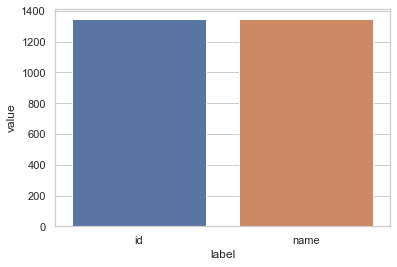

In [18]:
ax = sns.barplot(x="label", y="value", data=relation_counts)

In [19]:
triple = psql.read_sql("SELECT * FROM train UNION SELECT * FROM valid UNION SELECT * FROM test", connection)
triple.head()

,id,subject,predicate,object
0,1,/m/01qscs,/award/award nominee/award nominations./award/...,/m/02x8n1n
1,1,/m/027rn,/location/country/form of government,/m/06cx9
2,1,/m/07pd_j,/film/film/genre,/m/02l7c8
3,2,/m/017dcd,/tv/tv program/regular cast./tv/regular tv app...,/m/06v8s0
4,2,/m/040db,/base/activism/activist/area of activism,/m/0148d


In [20]:
triple_counts = triple.count().to_frame()
triple_counts.head()

,0
id,592213
subject,592213
predicate,592213
object,592213


In [21]:
triple_counts = triple_counts.reset_index()
triple_counts.head()

,index,0
0,id,592213
1,subject,592213
2,predicate,592213
3,object,592213


In [22]:
triple_counts = triple_counts.rename(columns={'index': 'label', 0: 'value'})
triple_counts

,label,value
0,id,592213
1,subject,592213
2,predicate,592213
3,object,592213


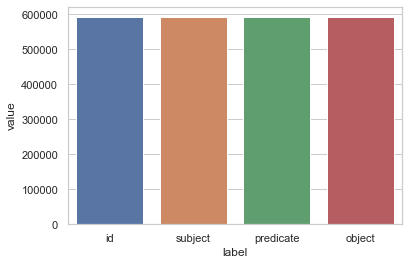

In [23]:
ax = sns.barplot(x="label", y="value", data=triple_counts)

In [24]:
triple_counts.loc[0, 'value']

592213

In [25]:
triple_count = pd.Series({'triple': triple_counts.loc[0, 'value']})
entity_count = pd.Series({'entity': entity_counts.loc[0, 'value']})
relation_count = pd.Series({'relation': relation_counts.loc[0, 'value']})

triple_entity_relation_counts = pd.DataFrame([triple_count, entity_count, relation_count])
triple_entity_relation_counts.head()

,triple,entity,relation
0,592213.0,NaN,NaN
1,NaN,14951.0,NaN
2,NaN,NaN,1345.0


In [26]:
triple_entity_relation_counts = pd.DataFrame([triple_counts.loc[0, 'value'], 
                                              entity_counts.loc[0, 'value'], 
                                              relation_counts.loc[0, 'value']], index=['triple', 'entity', 'relation'])
triple_entity_relation_counts.head()

,0
triple,592213
entity,14951
relation,1345


In [27]:
triple_entity_relation_counts = triple_entity_relation_counts.reset_index()
triple_entity_relation_counts.head()

,index,0
0,triple,592213
1,entity,14951
2,relation,1345


In [28]:
triple_entity_relation_counts = triple_entity_relation_counts.rename(columns={'index': 'label', 0: 'value'})
triple_entity_relation_counts.head()

,label,value
0,triple,592213
1,entity,14951
2,relation,1345


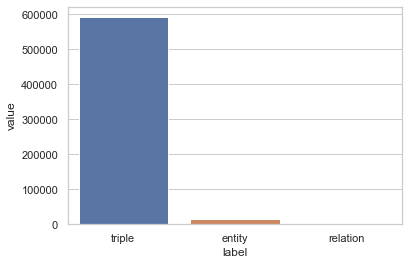

In [29]:
ax = sns.barplot(x="label", y="value", data=triple_entity_relation_counts)

In [30]:
fact = psql.read_sql("SELECT * FROM fact_train UNION SELECT * FROM fact_valid UNION SELECT * FROM fact_test", connection)
fact.head()

,id,subject,s_name,predicate,object,o_name
0,1,/m/01qscs,Benicio del Toro,/award/award nominee/award nominations./award/...,/m/02x8n1n,Independent Spirit Award for Best Supporting Male
1,1,/m/027rn,Dominican Republic,/location/country/form of government,/m/06cx9,Republic
2,1,/m/07pd_j,American Pie (film),/film/film/genre,/m/02l7c8,Romance film
3,2,/m/017dcd,Mighty Morphin Power Rangers,/tv/tv program/regular cast./tv/regular tv app...,/m/06v8s0,Wendee Lee
4,2,/m/040db,Jorge Luis Borges,/base/activism/activist/area of activism,/m/0148d,Anti-communism


In [31]:
fact = fact.drop(['id'], axis=1)
fact.index.name = 'id'
fact.head()

,subject,s_name,predicate,object,o_name
id,,,,,
0,/m/01qscs,Benicio del Toro,/award/award nominee/award nominations./award/...,/m/02x8n1n,Independent Spirit Award for Best Supporting Male
1,/m/027rn,Dominican Republic,/location/country/form of government,/m/06cx9,Republic
2,/m/07pd_j,American Pie (film),/film/film/genre,/m/02l7c8,Romance film
3,/m/017dcd,Mighty Morphin Power Rangers,/tv/tv program/regular cast./tv/regular tv app...,/m/06v8s0,Wendee Lee
4,/m/040db,Jorge Luis Borges,/base/activism/activist/area of activism,/m/0148d,Anti-communism


In [32]:
fact_counts = fact.count().to_frame()
fact_counts.head()

,0
subject,592213
s_name,592213
predicate,592213
object,592213
o_name,592213


In [33]:
fact_counts = fact_counts.reset_index()
fact_counts.head()

,index,0
0,subject,592213
1,s_name,592213
2,predicate,592213
3,object,592213
4,o_name,592213


In [34]:
fact_counts = fact_counts.rename(columns={'index': 'label', 0: 'value'})
fact_counts

,label,value
0,subject,592213
1,s_name,592213
2,predicate,592213
3,object,592213
4,o_name,592213


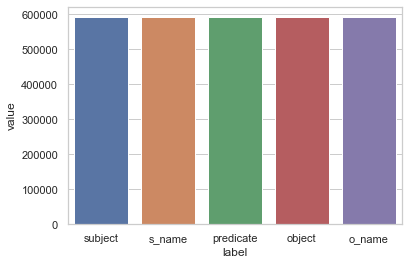

In [35]:
ax = sns.barplot(x="label", y="value", data=fact_counts)

In [36]:
predicate_counts = fact['predicate'].value_counts(dropna=False)
predicate_counts.head(50)

/award/award nominee/award nominations./award/award nomination/award nominee                       19764
/film/film/release date s./film/film regional release date/film release region                     15837
/award/award nominee/award nominations./award/award nomination/award                               14921
/award/award category/nominees./award/award nomination/award nominee                               14921
/people/person/profession                                                                          14220
/people/profession/people with this profession                                                     14220
/film/film/starring./film/performance/actor                                                        11638
/film/actor/film./film/performance/film                                                            11638
/award/award category/nominees./award/award nomination/nominated for                               11594
/award/award nominated work/award nominations./award/aw

In [37]:
predicate_counts.index

Index(['/award/award nominee/award nominations./award/award nomination/award nominee',
       '/film/film/release date s./film/film regional release date/film release region',
       '/award/award nominee/award nominations./award/award nomination/award',
       '/award/award category/nominees./award/award nomination/award nominee',
       '/people/person/profession',
       '/people/profession/people with this profession',
       '/film/film/starring./film/performance/actor',
       '/film/actor/film./film/performance/film',
       '/award/award category/nominees./award/award nomination/nominated for',
       '/award/award nominated work/award nominations./award/award nomination/award',
       ...
       '/common/resource/annotations./common/webpage/category',
       '/film/film featured song/performed by',
       '/base/petbreeds/dog coat color/dog breeds',
       '/cvg/game character/games./cvg/game performance/voice actor',
       '/base/usnationalparks/us national park/state',
    

In [38]:
predicate_counts = predicate_counts.reset_index()
predicate_counts.head()

,index,predicate
0,/award/award nominee/award nominations./award/...,19764
1,/film/film/release date s./film/film regional ...,15837
2,/award/award nominee/award nominations./award/...,14921
3,/award/award category/nominees./award/award no...,14921
4,/people/person/profession,14220


In [39]:
predicate_counts = predicate_counts.rename(columns={'index': 'label', 'predicate': 'value'})
predicate_counts.head()

,label,value
0,/award/award nominee/award nominations./award/...,19764
1,/film/film/release date s./film/film regional ...,15837
2,/award/award nominee/award nominations./award/...,14921
3,/award/award category/nominees./award/award no...,14921
4,/people/person/profession,14220


[Text(0, 0, '/award/award nominee/award nominations./award/award nomination/award nominee'),
 Text(0, 0, '/film/film/release date s./film/film regional release date/film release region'),
 Text(0, 0, '/award/award nominee/award nominations./award/award nomination/award'),
 Text(0, 0, '/award/award category/nominees./award/award nomination/award nominee'),
 Text(0, 0, '/people/person/profession'),
 Text(0, 0, '/people/profession/people with this profession'),
 Text(0, 0, '/film/film/starring./film/performance/actor'),
 Text(0, 0, '/film/actor/film./film/performance/film'),
 Text(0, 0, '/award/award category/nominees./award/award nomination/nominated for'),
 Text(0, 0, '/award/award nominated work/award nominations./award/award nomination/award'),
 Text(0, 0, '/award/award winner/awards won./award/award honor/award winner'),
 Text(0, 0, '/film/film/genre'),
 Text(0, 0, '/film/film genre/films in this genre'),
 Text(0, 0, '/award/award nominated work/award nominations./award/award nominat

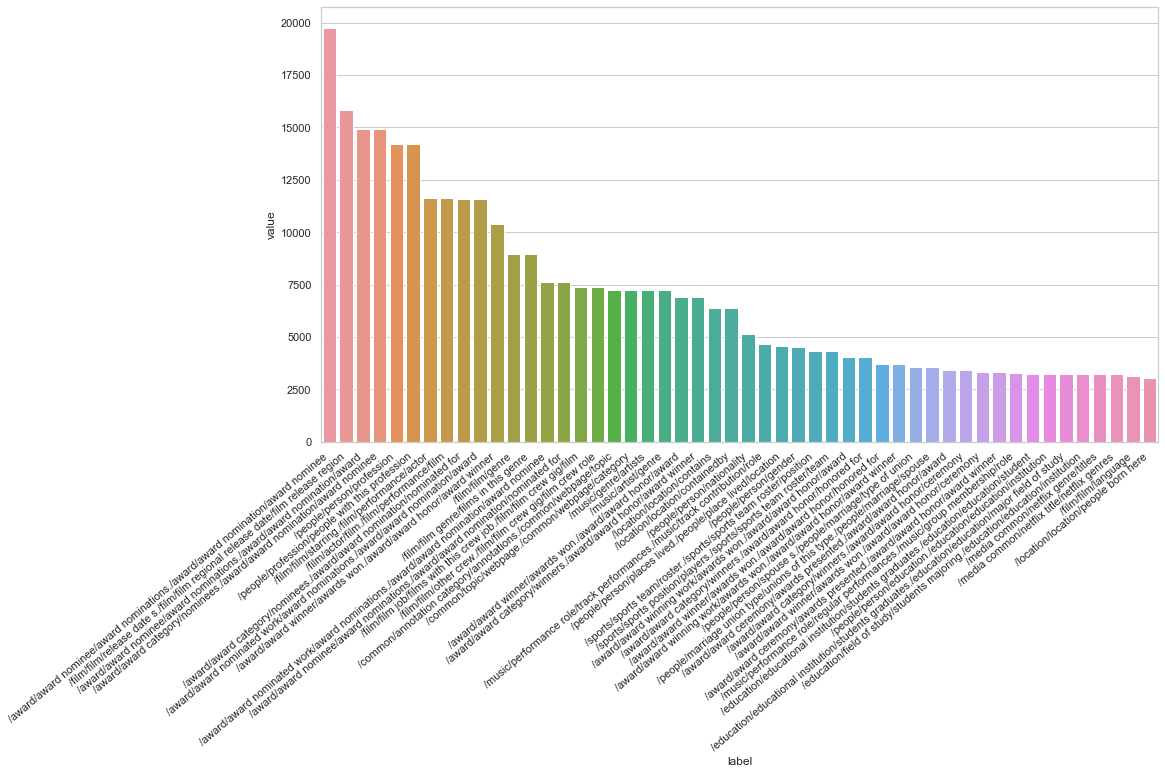

In [40]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="label", y="value", data=predicate_counts[:50])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [41]:
object_counts = fact['o_name'].value_counts(dropna=False).to_frame()
object_counts.head()

,o_name
United States,9645
United States dollar,7810
United States Department of Housing and Urban Development,4844
/m/08mbj5d,4384
Male,3643


In [42]:
fact.groupby(['object']).head()

,subject,s_name,predicate,object,o_name
id,,,,,
0,/m/01qscs,Benicio del Toro,/award/award nominee/award nominations./award/...,/m/02x8n1n,Independent Spirit Award for Best Supporting Male
1,/m/027rn,Dominican Republic,/location/country/form of government,/m/06cx9,Republic
2,/m/07pd_j,American Pie (film),/film/film/genre,/m/02l7c8,Romance film
3,/m/017dcd,Mighty Morphin Power Rangers,/tv/tv program/regular cast./tv/regular tv app...,/m/06v8s0,Wendee Lee
4,/m/040db,Jorge Luis Borges,/base/activism/activist/area of activism,/m/0148d,Anti-communism
...,...,...,...,...,...
591636,/m/05fly,New South Wales,/government/governmental jurisdiction/governin...,/m/02s0mt,New South Wales Legislative Assembly
591690,/m/019mlh,Shipbuilding,/business/industry/companies,/m/0974y,General Dynamics Electric Boat
591930,/m/08mbj32,/m/08mbj32,/common/annotation category/annotations./commo...,/m/05cxb38,/m/05cxb38


In [43]:
object_counts.index

Index(['United States', 'United States dollar',
       'United States Department of Housing and Urban Development',
       '/m/08mbj5d', 'Male', 'English language', 'Marriage',
       'Forward (association football)', 'Midfielder',
       'Defender (association football)',
       ...
       'Baroque', 'Volcano', 'Role-playing game', 'Georgian architecture',
       'Mountain range', 'Rapid transit', 'Pornographic film', 'National park',
       'Northern line', 'Provisional Irish Republican Army'],
      dtype='object', length=14930)

In [44]:
object_counts = object_counts.reset_index()
object_counts.head()

,index,o_name
0,United States,9645
1,United States dollar,7810
2,United States Department of Housing and Urban ...,4844
3,/m/08mbj5d,4384
4,Male,3643


In [45]:
object_counts = object_counts.rename(columns={'index': 'label', 'o_name': 'value'})
object_counts.head()

,label,value
0,United States,9645
1,United States dollar,7810
2,United States Department of Housing and Urban ...,4844
3,/m/08mbj5d,4384
4,Male,3643


[Text(0, 0, 'United States'),
 Text(0, 0, 'United States dollar'),
 Text(0, 0, 'United States Department of Housing and Urban Development'),
 Text(0, 0, '/m/08mbj5d'),
 Text(0, 0, 'Male'),
 Text(0, 0, 'English language'),
 Text(0, 0, 'Marriage'),
 Text(0, 0, 'Forward (association football)'),
 Text(0, 0, 'Midfielder'),
 Text(0, 0, 'Defender (association football)'),
 Text(0, 0, '/m/08mbj32'),
 Text(0, 0, 'Actor'),
 Text(0, 0, 'Goalkeeper (association football)'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Drama film'),
 Text(0, 0, 'DVD'),
 Text(0, 0, 'New York City'),
 Text(0, 0, 'Guitar'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Film producer'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Screenwriter'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Female'),
 Text(0, 0, '/m/0ch6mp2'),
 Text(0, 0, 'Make-up artist'),
 Text(0, 0, 'Supervising Sound Editor'),
 Text(0, 0, 'Los Angeles'),
 Text(0, 0, 'England'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Visual effects supervisor'),
 Text(0, 0, 'Piano'),
 Text(0, 0, 

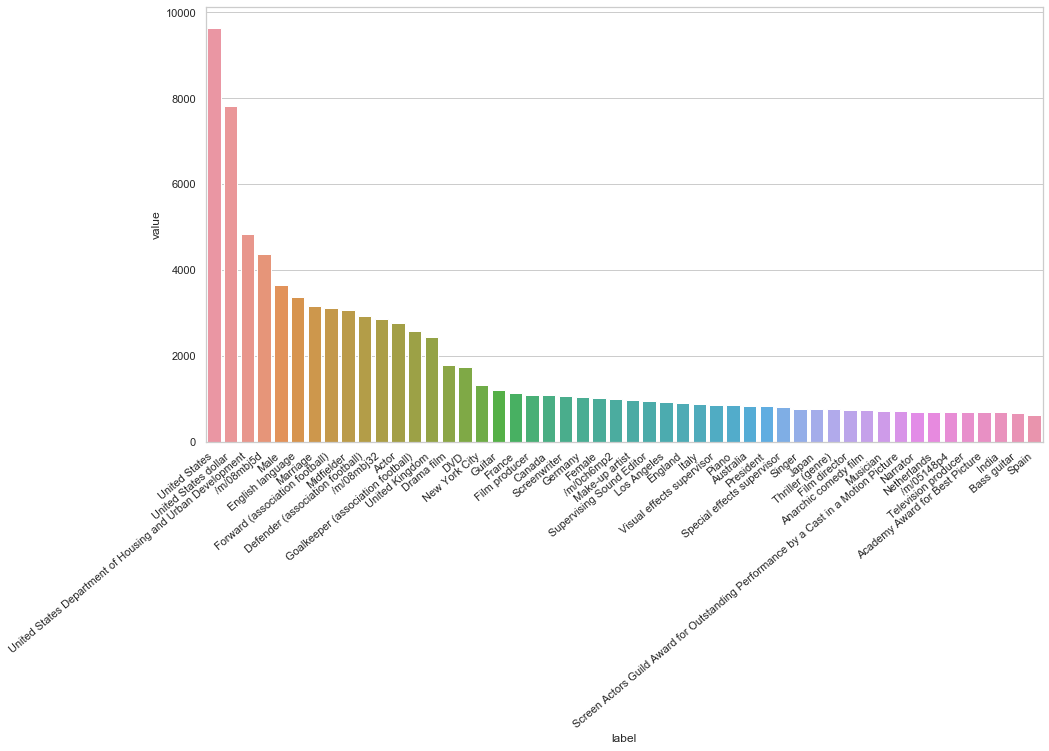

In [46]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="label", y="value", data=object_counts[:50])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [47]:
subject_counts = fact['s_name'].value_counts().to_frame()
subject_counts.head()

,s_name
/m/08mbj5d,4381
Marriage,3682
/m/08mbj32,2867
Actor,2769
United States,2318


In [48]:
subject_counts.index

Index(['/m/08mbj5d', 'Marriage', '/m/08mbj32', 'Actor', 'United States',
       'Drama film', 'Forward (association football)', 'Midfielder',
       'Defender (association football)', 'Goalkeeper (association football)',
       ...
       'Pornographic film', 'Productivity', 'Rapid transit',
       'Strongman (strength athlete)', 'Volcano', 'Rotorua', 'Luftwaffe',
       'Nature', 'Benjamin Franklin Medal (Franklin Institute)',
       'Crown prince'],
      dtype='object', length=14865)

In [49]:
subject_counts = subject_counts.reset_index()
subject_counts.head()

,index,s_name
0,/m/08mbj5d,4381
1,Marriage,3682
2,/m/08mbj32,2867
3,Actor,2769
4,United States,2318


In [50]:
subject_counts = subject_counts.rename(columns={'index': 'label', 's_name': 'value'})
subject_counts.head()

,label,value
0,/m/08mbj5d,4381
1,Marriage,3682
2,/m/08mbj32,2867
3,Actor,2769
4,United States,2318


[Text(0, 0, '/m/08mbj5d'),
 Text(0, 0, 'Marriage'),
 Text(0, 0, '/m/08mbj32'),
 Text(0, 0, 'Actor'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'Drama film'),
 Text(0, 0, 'Forward (association football)'),
 Text(0, 0, 'Midfielder'),
 Text(0, 0, 'Defender (association football)'),
 Text(0, 0, 'Goalkeeper (association football)'),
 Text(0, 0, 'Guitar'),
 Text(0, 0, 'Film producer'),
 Text(0, 0, 'Screenwriter'),
 Text(0, 0, '/m/0ch6mp2'),
 Text(0, 0, 'Make-up artist'),
 Text(0, 0, 'Supervising Sound Editor'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Visual effects supervisor'),
 Text(0, 0, 'Piano'),
 Text(0, 0, 'President'),
 Text(0, 0, 'Special effects supervisor'),
 Text(0, 0, 'Singer'),
 Text(0, 0, 'Thriller (genre)'),
 Text(0, 0, 'Film director'),
 Text(0, 0, 'Anarchic comedy film'),
 Text(0, 0, 'Musician'),
 Text(0, 0, 'Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture'),
 Text(0, 0, 'Narrator'),
 Text(0, 0, '/m/05148p4'),
 Text(0, 0, 'Television p

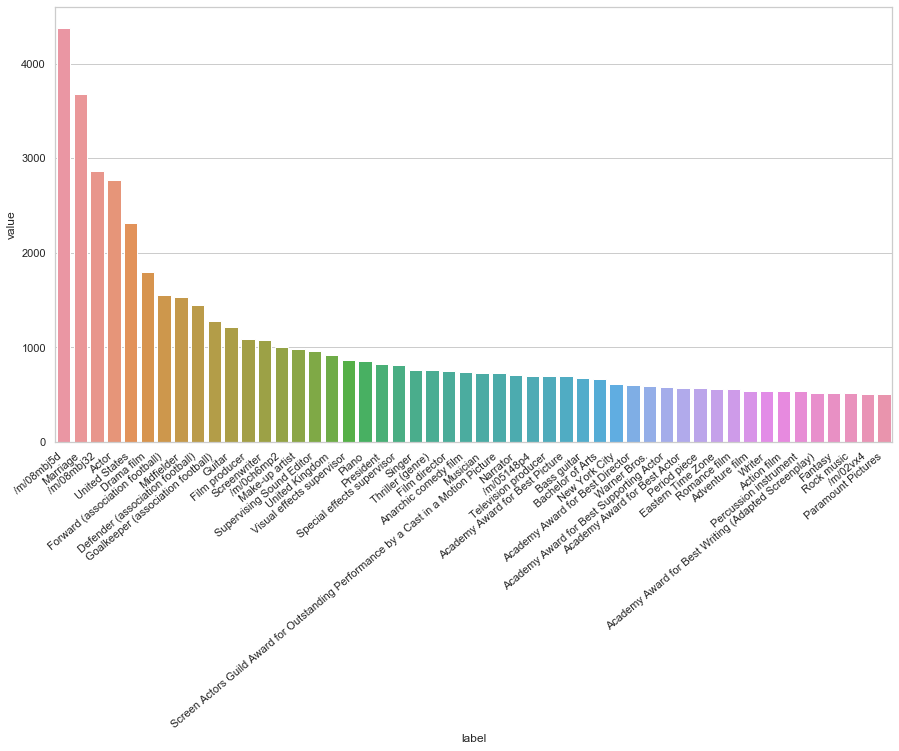

In [51]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="label", y="value", data=subject_counts[:50])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")